# 教程

## 使用Imag")

Python图像库中最重sp;[`Imbsp;类，在具有相同名称的模块中定义。您可以通过多种方式创建这个类的实例：从文件中加载图像、处理其他图像或从头创建图像。

要从文件加载`Image`模块的nbsp;[`o&n</ins>

In [1]:
from PIL import Image
im = Image.open("cl.jpg")

如果成功，此函数将返回`Image`对象。现在可以使用实例属性检查文件内容：

In [2]:
print(im.format, im.size, im.mode)

JPEG (350, 350) RGB


这个&nbsp;`format`&nbsp;属性标识图像的源。如果图像不是从文件中读取的，则将其设置为“无”。大小属性是包含宽度和高度（以像素为单位）的2元组。这个&nbsp;`mode`&nbsp;属性定义图像中带区的编号和名称，以及像素类型和深度。常用模式有灰度图像的“L”（亮度）、真彩色图像的“RGB”和预压图像的“CMYK”。

如果无法打开文件，则&nbsp;`IOError`&nbsp;引发异常。

一旦你有了&nsp;`Image`&nbsp;类，可以使用该类定义的方法来处理和操作图像。例如，让我们显示刚刚加载的图像：

In [3]:
im.show()

注解：
的标准版本&nbsp;`show()`&nbsp;不是很有效，因为它将图像保存到临时文件并调用实用程序来显示图像。如果您没有安装适当的实用程序，它甚至不会工作。但是，当它确实工作时，它对于调试和测试非常方便。

以下各节概述了此库中提供的不同功能。

# 读写图像

python图像库支持各种各样的图像文件格式。要从磁盘读取文件，请用&nbsp;`open()`&nbsp;功能在&nbsp;`Image`&nbsp;模块。打开文件不需要知道文件格式。库根据文件的内容自动确定格式。

要保存文件请使用&nbsp;`Image.save()`&nbsp;方法&nbsp`Image.Image`类。保存文件时，名称变得很重要。除非指定格式，否则库将使用文件扩展名来发现要使用的文件存储格式。

##  将文件存储为png格式

In [6]:
im.save('temp.png')

第二个参数可以提供给&nbsp;`save()`&nbsp;方法，该方法显式指定文件格式。如果使用非标准扩展名，则必须始终按以下方式指定格式：

### 创建jpeg缩略图

In [7]:
size = (128, 128)
im.thumbnail(size)
im.save('thumb', "PNG")
       

## 剪切、粘贴和合并图像

这个&nbsp;`Image`&nbsp;类包含允许您操作图像中区域的方法。要从图像中提取子矩形，请使用&nbsp;`crop()`&nbsp;方法。

### 从图像复制矩形区域

In [16]:
im = Image.open("cl2.jpg")
box = (100, 100, 400, 400)
region = im.crop(box)

区域由四元组定义，其中坐标为（左、上、右、下）。python图像库使用左上角带有（0，0）的坐标系。还要注意，坐标是指像素之间的位置，因此上面示例中的区域正好是300x300像素。

该区域现在可以以某种方式进行处理并粘贴回去。

### 处理矩形，然后粘贴回去

In [17]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)

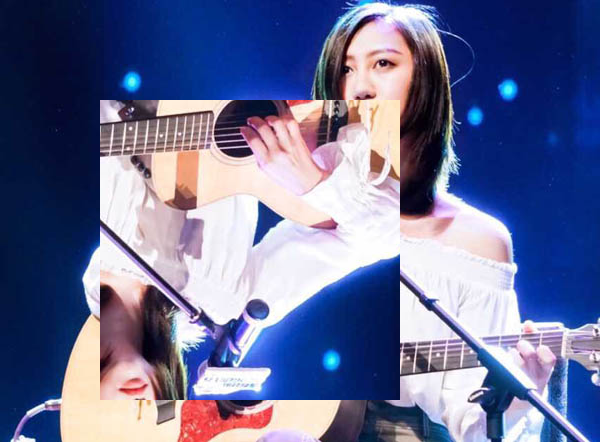

In [18]:
im

粘贴区域时，区域的大小必须与给定区域完全匹配。此外，区域不能扩展到图像之外。但是，原始图像和区域的模式不需要匹配。如果没有，则在粘贴之前区域将自动转换（请参见颜色空间变换详情见下文）。

下面是一个附加示例：

### 滚动图像

In [19]:
def roll(image, delta):
    """Roll an image sideways."""
    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))

    return image

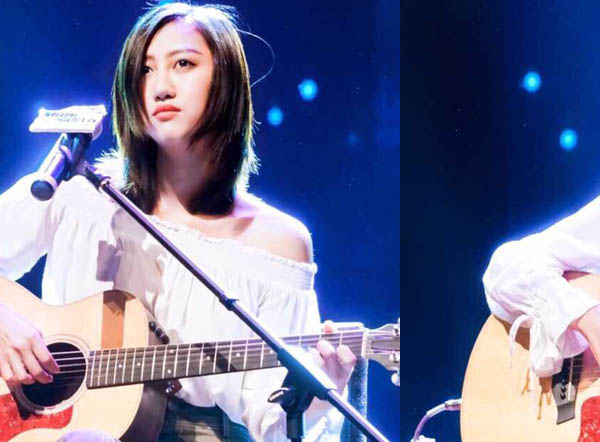

In [21]:
im = Image.open("cl2.jpg")
roll(im,200)

对于更高级的技巧，粘贴方法还可以将透明蒙版作为可选参数。在此遮罩中，值255表示粘贴的图像在该位置是不透明的（即，粘贴的图像应按原样使用）。值0表示粘贴的图像完全透明。中间的值表示不同的透明度级别。例如，粘贴rgba图像并将其用作遮罩将粘贴图像的不透明部分，但不会粘贴其透明背景。

python图像库还允许您使用多波段图像的各个波段，例如RGB图像。split方法创建一组新图像，每个新图像包含原始多波段图像的一个波段。merge函数接受一个模式和一组图像，并将它们组合成一个新图像。以下示例交换RGB图像的三个波段：

### 拆分和合并波段

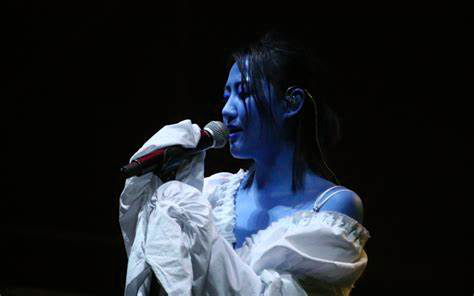

In [23]:
im = Image.open("cl1.jpg")
r, g, b = im.split()
Image.merge("RGB", (b, g, r))

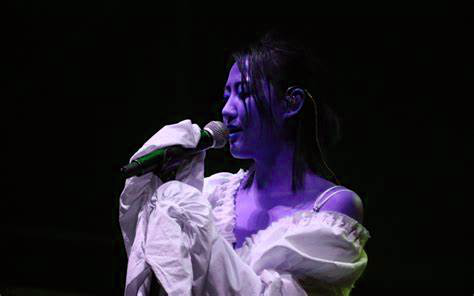

In [25]:
Image.merge("RGB", (g, b, r))

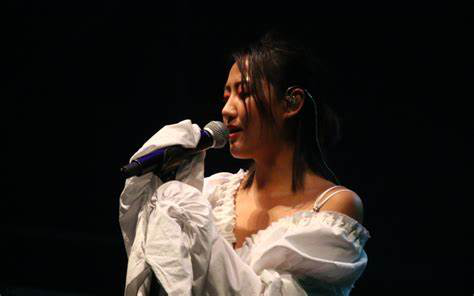

In [24]:
im

注意对于单波段图像，&nbsp;`split()`&nbsp;返回图像本身。要使用单独的色带，您可能需要先将图像转换为“RGB”。

## 几何变换

这个&nbsp;`PIL.Image.Image`&nbsp;类包含的方法&nbsp;`resize()`&nbsp;和&nbsp;`rotate()`&nbsp;图像。前者用一个元组给出新的大小，后者用逆时针的度数表示角度。

### 简单几何变换

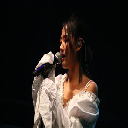

In [26]:
im.resize((128, 128))


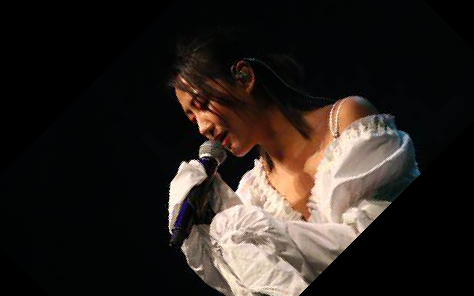

In [27]:
im.rotate(45) # degrees counter-clockwise

要将图像旋转90度，可以使用&nbsp;`rotate()`&nbsp;方法或&nbsp;`transpose()`&nbsp;方法。后者还可用于围绕其水平或垂直轴翻转图像。

### 转置转置图像

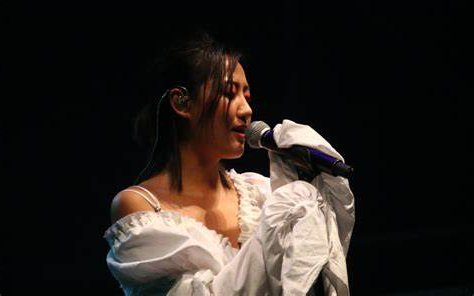

In [28]:
im.transpose(Image.FLIP_LEFT_RIGHT)


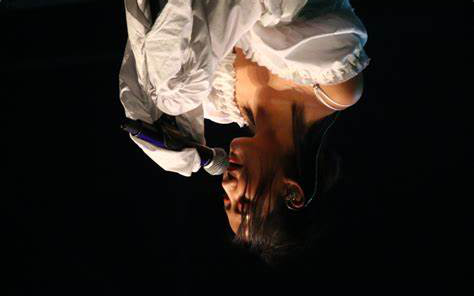

In [29]:
im.transpose(Image.FLIP_TOP_BOTTOM)


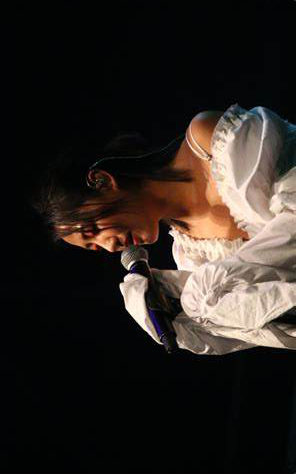

In [30]:
im.transpose(Image.ROTATE_90)


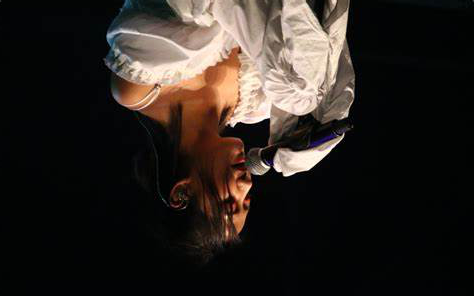

In [31]:
im.transpose(Image.ROTATE_180)


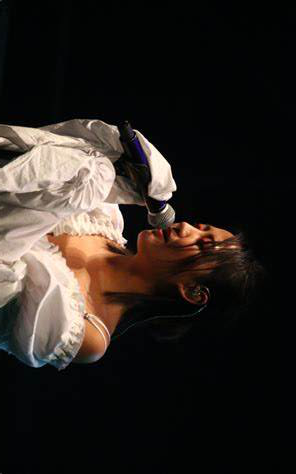

In [32]:
im.transpose(Image.ROTATE_270)

`transpose(ROTATE)`&nbsp;也可以使用&nbsp;`rotate()`&nbsp;操作，前提是&nbsp;`expand`&nbsp;标志为真，以提供对图像大小的相同更改。

一种更通用的图像转换形式可以通过&nbsp;`transform()`&nbsp;方法。

## 颜色空间变换

python图像库允许您使用&nbsp;`convert()`&nbsp;方法。

### 模式间转换

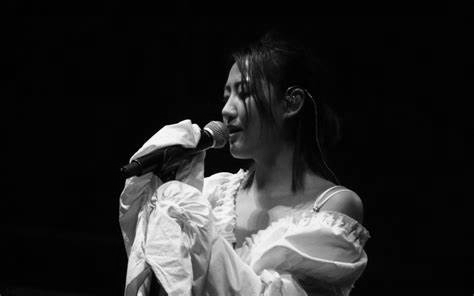

In [33]:
im.convert("L")

库支持每个支持的模式与“l”和“rgb”模式之间的转换。要在其他模式之间转换，您可能需要使用中间图像（通常是“RGB”图像）。

## 图像增强

python图像库提供了许多方法和模块，可以用来增强图像。

### 过滤器

这个&nbsp;`ImagFilter()`&nbsp;模块包含许多预定义的增强过滤器，可于&nbsp;`filter()`&nbsp;方法。


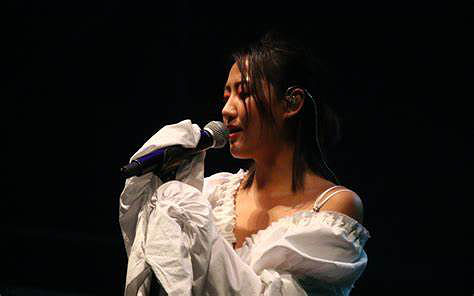

In [34]:
from PIL import ImageFilter
im.filter(ImageFilter.DETAIL)

### 点操作

这个&nbsp;`point()`&nbsp;方法可用于转换图像的像素值（例如图像对比度操作）。在大多数情况下，需要一个参数的函数对象可以传递给这个方法。每个像素都根据该功能进行处理：

#### 应用点变换

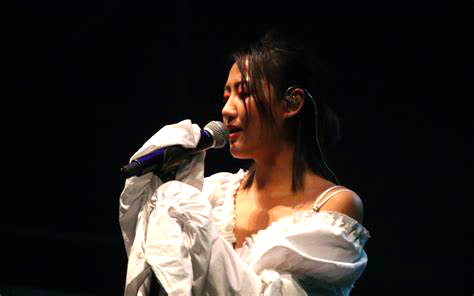

In [35]:
# multiply each pixel by 1.2
im.point(lambda i: i * 1.2)

使用上述技术，您可以快速地将任何简单表达式应用于图像。您也可以将&nbsp;`point()`&nbsp;和&nbsp;`paste()`&nbsp;有选择地修改图像的方法：

#### 处理单个处理单个波段

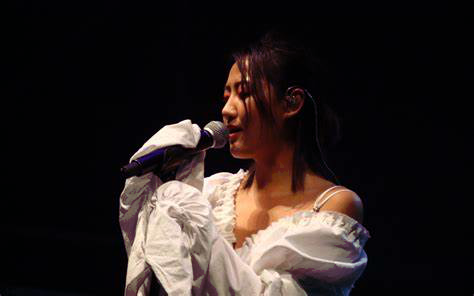

In [36]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
Image.merge(im.mode, source)

注意用于创建掩码的语法：
```
imout = im.point(lambda i: expression and 255)
```

python只计算逻辑表达式中确定结果所必需的部分，并返回作为表达式结果检查的最后一个值。因此，如果上面的表达式为false（0），python不会查看第二个操作数，因此返回0。否则，返回255。

### 增强

对于更高级的图像增强，可以使用&nsp;`ImageEnhance()`&nbsp;模块。从图像创建后，可以使用增强对象快速尝试不同的设置。

您可以通过这种方式调整对比度、亮度、颜色平衡和清晰度。

#### 增强图像

In [37]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")

## 图像序列

python图像库包含对图像序列（也称为动画格式）的一些基本支持。支持的序列格式包括fli/flc、gif和一些实验格式。TIFF文件也可以包含多个帧。

打开序列文件时，PIL会自动加载序列中的第一帧。您可以使用Seek和Tell方法在不同的帧之间移动：

### 读取序列

In [ ]:
from PIL import Image

with Image.open("animation.gif") as im:
    im.seek(1) # skip to the second frame

    try:
        while 1:
            im.seek(im.tell()+1)
            # do something to im
    except EOFError:
        pass # end of sequence

如本例所示，您将得到&nbsp;`EOFError`&nbsp;序列结束时出现异常。

以下类允许您使用for语句循环序列：

### 使用ImageSequence迭代器类

In [ ]:
from PIL import ImageSequence
for frame in ImageSequence.Iterator(im):
    # ...do something to frame...

## PostScript打印

python图像库包括在PostScript打印机上打印图像、文本和图形的功能。下面是一个简单的例子：

### 绘图附言

In [ ]:
from PIL import Image
from PIL import PSDraw

with Image.open("hopper.ppm") as im:
    title = "hopper"
    box = (1*72, 2*72, 7*72, 10*72) # in points

    ps = PSDraw.PSDraw() # default is sys.stdout
    ps.begin_document(title)

    # draw the image (75 dpi)
    ps.image(box, im, 75)
    ps.rectangle(box)

    # draw title
    ps.setfont("HelveticaNarrow-Bold", 36)
    ps.text((3*72, 4*72), title)

    ps.end_document()

## 关于阅读图像的更多信息

如前所述，&nbsp;`open()`&nbsp;功能&nbsp;`Image()`&nbsp;模块用于打开图像文件。在大多数情况下，只需将文件名作为参数传递给它。&nbsp;`Image.open()`&nbsp;可以用作上下文管理器：

In [ ]:
from PIL import Image
with Image.open("hopper.ppm") as im:
    ...

如果一切顺利，结果是&nbsp;`PIL.Image.Image`&nbsp;对象。否则，&nbsp;`IOError`&nbsp;引发异常。

您可以使用类似文件的对象，而不是文件名。对象必须实现&nbsp;`read()`&nbsp;，&nbsp;`seek()`&nbsp;和&nbsp;`tell()`&nbsp;方法，并以二进制模式打开。

### 从打开的文件读取

In [ ]:
from PIL import Image
with open("hopper.ppm", "rb") as fp:
    im = Image.open(fp)

要从二进制数据中读取图像，请使用&nbsp;`BytesIO`&nbsp;类：

### 从二进制数据读取

In [ ]:
from PIL import Image
import io
im = Image.open(io.BytesIO(buffer))

请注意，库会倒带文件（使用&nbsp;`seek(0)`&nbsp;）在读取图像头之前。此外，当读取图像数据时（通过加载方法），也将使用SEEK。如果图像文件嵌入到较大的文件中，例如tar文件，则可以使用&nbsp;`ContainerIO`&nbsp;或&nbsp;`TarIO`&nbsp;访问它的模块。

### 从tar档案中读取

In [ ]:
from PIL import Image, TarIO

fp = TarIO.TarIO("Tests/images/hopper.tar", "hopper.jpg")
im = Image.open(fp)

## 控制解码器

有些解码器允许您在从文件读取图像时对其进行操作。这通常可用于在创建缩略图（速度通常比质量更重要）和打印到单色激光打印机（只需要图像的灰度版本）时加快解码速度。

这个&nsp;[`drafft")&nbsp;方法处理打开但尚未加载的图像，使其尽可能接近给定的模式和大小。这是通过重新配置图像解码器来完成的。

### 在草稿模式下阅读

这仅适用于jpeg和mpo文件。

In [ ]:
from PIL import Image

with Image.open(file) as im:
    print("original =", im.mode, im.size)

    im.draft("L", (100, 100))
    print("draft =", im.mode, im.size)

这打印的内容如下：

In [ ]:
original = RGB (512, 512)
draft = L (128, 128)